![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Integrais e Primitivas

Neste teste, vamos usar os métodos de integração para calcular primitivas de funções.

De forma análoga ao caso de EDOs, vamos retornar dois `np.array`s:
- um com os pontos onde a primitiva foi calculada; e
- outro com o valor da aproximação numérica da primitiva.

In [236]:
import numpy as np
import matplotlib.pyplot as plt

# Questão 0: o método do retângulo

Para evitar efeitos de bordo e arredondamento, vamos usar o método do retângulo criando pontos com `np.linspace`:

In [237]:
def retangulo(f, a, b, n=1000):
    if a == b:
        return 0
    pts, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
    soma = 0
    for p in pts: 
      soma += f(p) * h
    return soma

Explique porque os pontos criados têm `endpoint=False`

Porque para cada intervalo, será calculada uma area de um retângulo em função do 'step'  $h$ (passo - espaçamento entre os pontos de cada subintervalo) e do $f(x)$, ou seja, o valor da função aplicada ao primeiro ponto do subintervalo. Esses retângulos serão somados, e a sua àrea deve corresponder a uma aproximação da integral da função $f(x)$ no intervalo $[a,b]$ definido. 

No caso do ultimo ponto do intervalo, caso fosse incluido no somatório, estariamos calculando um retângulo após o intervalo definido, pois cada retângulo considera o ponto inicial até o esse ponto $+ h$ do subintervalo, ou seja, se fizessemos a inclusão desse ultimo retângulo, estariamos incluindo ao somatório o intervalo $[b, b+h]$. Como o ultimo ponto já é o final do intervalo, estaria errado considera-lo e esse subintervalo está fora do intervalo dado $[a,b]$. Logo, é necessário especificar que os pontos criados não incluem o ultimo valor, ou seja, `endpoint=False`.

In [238]:
ans = (np.cos(0) - np.cos(1))
assert abs(retangulo(np.sin, 0, 1) - ans) < 1e-3

In [239]:
ans = (np.cos(0) - np.cos(1))
assert abs(retangulo(np.sin, 0, 1) - ans) > 1e-4

In [240]:
ans = (np.cos(0) - np.cos(2))
assert 1e-5 < abs(retangulo(np.sin, 0, 2, n=10**4) - ans) < 1e-4

# Questão 1: O jeito fácil

Escreva uma função `primitiva_retangulo`,
que calcula a integral de $a$ até cada um dos pontos escolhidos,
**incluindo** $a$,
chamando o método do retângulo para cada um deles.

In [241]:
def primitiva_retangulo(f, a, b, h=0.01):
    """Primitiva da função  f, usando um passo de tamanho  h  no intervalo  [a,b]."""
    pts = np.arange(a, b, h)
    Fs = np.array([ retangulo(f, a, p, i) for (i, p) in enumerate(pts) ])
    return pts, Fs

In [242]:
pts, Fs = primitiva_retangulo(np.sin, 0, 1)
assert len(Fs) == len(pts)

In [243]:
assert np.allclose(Fs, 1- np.cos(pts), atol=1e-2)

In [244]:
assert not np.allclose(Fs, 1 - np.cos(pts), atol=1e-3)

## Questão 2: Gráficos

Faça os gráficos dos erros de cálculo das primitivas, no intervalo $[0, 1.5]$, das seguintes funções:
- Seno
- Exponencial
- Cosseno

para quatro valores de passo: `1e-2`, `5e-3`, `2e-3` e `1e-3`.

Use 3 eixos, um para cada função, e 4 curvas em cada eixo.

Text(0.5, 1.0, 'Erro função cosseno')

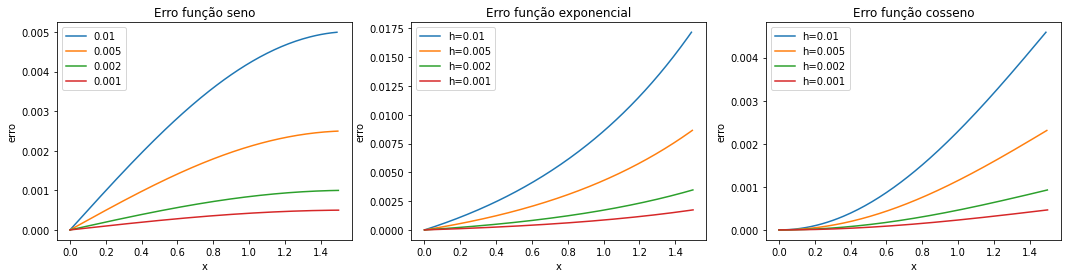

In [245]:
fig, axs = plt.subplots(ncols=3, figsize=(18,4))
hs = [1e-2, 5e-3, 2e-3, 1e-3]
a = 0
b = 1.5

e_sen = ['sen']
e_cos = ['cos']
e_exp = ['exp']

for h in hs:
  pts, Fs = primitiva_retangulo(np.sin, a, b, h)
  i = [(1 - np.cos(p)) for p in pts] #valor real
  e = abs(i -Fs) # valor real - valor calculado pelo metodo do retangulo
  axs[0].plot(pts, e, label=f"{h}" )
  axs[0].set_xlabel("x")
  axs[0].set_ylabel("erro")

  e_sen.append(e[-1]) #inclusão de ultimo valor de erro no vetor e_sen para exibir depois

axs[0].legend()
axs[0].set_title('Erro função seno')

for h in hs:
  pts, Fs = primitiva_retangulo(np.exp, a, b, h)
  i = [(np.exp(p)- 1) for p in pts] 
  e = abs(i -Fs) 
  axs[1].plot(pts, e, label='h='+ f"{h}" )
  axs[1].set_xlabel("x")
  axs[1].set_ylabel("erro")
  
  e_exp.append(e[-1])

axs[1].legend()
axs[1].set_title('Erro função exponencial')

for h in hs:
  pts, Fs = primitiva_retangulo(np.cos, a, b, h)
  i = [(np.sin(p)) for p in pts] 
  e = abs(i -Fs) 
  axs[2].plot(pts, e, label='h='+ f"{h}" )
  axs[2].set_xlabel("x")
  axs[2].set_ylabel("erro")
  e_cos.append(e[-1])
axs[2].legend()
axs[2].set_title('Erro função cosseno')


In [246]:
for ax in axs:
    assert len(ax.lines) == 4
    assert len(ax.get_legend().texts) == 4
    assert len(ax.get_title()) > 0

In [247]:
for ax in axs:
    for l in ax.lines:
        assert max(np.abs(l.get_ydata())) < 2e-2

Qual o erro, na extremidade final do intervalo, para cada um dos métodos e valores de $h$?

Imprima uma tabela, com 3 colunas e 4 linhas (fora as "de título"), usando `print` formatado.

In [248]:
print ("{:<8} {:<25} {:<25} {:<25}".format('h',  e_sen[0],  e_exp[0],  e_cos[0]))

for i in np.arange(0,4):
  h, h_sen, h_exp, h_cos = hs[i], e_sen[i+1], e_exp[i+1], e_cos[i+1]
  print ("{:<8} {:<25} {:<25} {:<25} ".format(h, h_sen, h_exp, h_cos))

h        sen                       exp                       cos                      
0.01     0.004991349535912737      0.01715683518009614       0.0045881515959481645     
0.005    0.002494747659798846      0.008641134433969633      0.0023086132183823826     
0.002    0.0009976606066429694     0.003471577071461507      0.0009269355006368274     
0.001    0.0004987892307801722     0.0017383150432168648     0.00046404955079271115    


Como os erros se comportam ao diminuir o passo?  Isso é esperado?

Conforme o passo $h$ é diminuido, os erros tendem a diminuir, em todas as funções, já que por definição o método do retangulo ao utilizar o somatório de retângulos para aproximação de uma integral, conforme o passo $h$ diminui, aumentamos o número de retângulos mais 'finos' no intervalo(considerando fixo), fazendo com que o valor calculado no somatório seja mais parecido com a integral da função naquele intervalo. Considerando o mesmo raciocionio de uma integral, onde fazemos a soma de pequenos retângulos de base $\Delta x = h$ tendendo a zero e altura $f(x_{i})$, onde somatório dos produtos $f(x_{i}) \cdot \Delta x$ é a área deste retângulo, desse modo, conforme menor for o passo, o valor calculado pelo metodo do retângulo se aproxima da definição de uma integral, onde o passo tende a $0$.

Como os erros se comportam ao longo do eixo dos $x$, ou seja, ao calcular primitivas "cada vez mais longe"?  Como você explica este fenômeno?

Conforme aumenta o intervalo de integração, o erro tende a aumentar. Isso acontece, já que para um passo fixo $h$, quanto maior o intervalo, maior o será o número de retângulos utilizados no cálculo da aproximação da integral da função nesse intervalo.

Como cada retângulo associado a um subintervalo do intervalo possui um erro característico, que envolve a diferença entre o valor real da integral e o valor da área do retângulo do subintervalo, o erro final será a soma de todos os erros presentes em cada subintervalo, ou seja, para cada retângulo.

Desse modo, conforme aumentamos o intervalo aplicado ao método do retângulo, considerando um mesmo $h$, consequentemente aumentamos o número de retângulos, e assim, também, o valor do erro.  

Como os erros se comportam para as diferentes funções?  Você esperava isso?

É perceptivel que o erro da função exponencial é maior que os erros apresentados nas funções de seno e cosseno, o que já poderia ser previsto, tendo em conta que o erro depende tanto do tamanho do passo $h$, como também da derivada da função (taxa de crescimento), o que pode ser verificado por uma expansão de taylor. Isso acontece porque esse método assume que a área do retângulo equivale a área real do intervalo, mas para isso seria necessário que o valor da função $f(x)$ no início e no final daquele subintervalo fosse o mesmo.

Assim, quanto maior for a variação da função naquele intervalo, maior deve ser o erro também. Isso acontece na função exponencial em contraposto às funções trigonométricas, já que a derivada da função exponencial é também é uma função exponencial e a cada subintervalo vai possuir uma maior variação conforme cresce o intervalo no eixo $x$, enquanto as derivadas das funções de seno e cosseno são funções trigonométricas, e vão apresentar uma variação de $0$ e $1$ em módulo. 

## Questão 3: O jeito mais rápido

Na questão anterior, ao calcular a primitiva de $[a, a+2h]$, era necessário calcular $f(a)$ e $f(a+h)$.
Ora, $f(a)$ já tinha sido calculada para a primitiva em $[a, a+h]$ (era o único termo!),
então podemos evitar estas contas repetidas.

Vamos fazer uma nova primitiva, `primitiva_rapida`, que calcula apenas uma vez `f(pts)`,
e calcula as somas parciais usando [`np.cumsum`](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html).

Explique porque é ruim (neste caso!) que `np.cumsum` **não** retorne a soma vazia.

In [249]:
np.cumsum([1, 2])

array([1, 3])

Porque para calcular as primitivas, pela definição, é retornada a área equivalente ao método do retângulo para cada subintervalo de $a$ até $a+n \cdot h$, considerando todos os $n$ pontos dentro do intervalo $[a,b]$ espaçados pelo passo $h$. Sabendo que esses valores de área são cumulativos, é interessante a utilização do método `np,cumsum`. 

Contudo, como no cálculo da primitiva devemos começar pelo intervalo $[a,a]$, seria ideal que o primeiro valor fosse a soma vazia, então ao utilizar o `np.cumsum`, não será retornado o primeiro valor da primitiva, ou seja, a integral de $a$ ate $a$ que tem o passo $h=0$, e área igual a $0$. Assim esse valor deve ser incluido logo após as somas cumulativas com o `np.hstack`.

Para incluir a soma vazia (que vale zero!), use `np.hstack`.

In [250]:
np.hstack([[0], [1, 3]])

array([0, 1, 3])

In [251]:
def primitiva_rapida(f, a, b, h=0.01):
    """Primitiva da função  f, usando um passo de tamanho  h  no intervalo  [a,b]."""
    pts = np.arange(a, b, h)
    ret = []
    for i in range(len(pts)-1):
      ret.append(retangulo(f, pts[i], pts[i+1], n=1))
    return (pts, np.hstack([[0], np.cumsum(ret)]))


In [252]:
pts, Fs = primitiva_rapida(np.sin, 0, 1)
assert len(pts) == len(Fs)

In [253]:
assert np.allclose(Fs, 1 - np.cos(pts), atol=1e-2)

In [254]:
assert not np.allclose(Fs, 1 - np.cos(pts), atol=1e-3)

Ambas as funções devem ser (a menos de erro de truncamento / arredondamento) iguais:

In [255]:
_, Fs_original = primitiva_retangulo(np.sin, 0, 1)
assert np.allclose(Fs, Fs_original, atol=1e-15, rtol=1e-15)

## Questão 4: E terá valido a pena?

Observe as duas caixas abaixo

In [205]:
%time primitiva_retangulo(np.sin, 0, 1, h=1e-4)
%time primitiva_retangulo(np.sin, 0, 1, h=1e-3)
None

CPU times: user 1min 21s, sys: 222 ms, total: 1min 21s
Wall time: 1min 21s
CPU times: user 878 ms, sys: 9.25 ms, total: 887 ms
Wall time: 872 ms


In [189]:
%time primitiva_rapida(np.sin, 0, 1, h=1e-4)
%time primitiva_rapida(np.sin, 0, 1, h=1e-3)
None

CPU times: user 328 ms, sys: 944 µs, total: 329 ms
Wall time: 333 ms
CPU times: user 33.6 ms, sys: 0 ns, total: 33.6 ms
Wall time: 33.4 ms


Quão mais rápido é o método usando `np.cumsum`?

Muito mais rápido. Considerando o mesmo passo para diferentes funções, a primitiva rápida é extremamene mais eficiente. Para o passo $h=10^{-3}$, temos que a primitiva original demora cerca de $872ms$  enquanto a primitiva rápida demora $33.4ms$ . Assim a primitiva rápida é aproximadamente $26$ vezes mais rápida nesse passo:

$$ \frac{872 ms}{33.4 ms} \approx 26 $$

Enquanto para o passo $h=10^{-4}$:
 
$$ \frac{81000 ms}{333 ms} \approx 243 $$
 
Ela é aproximadamente $243$ vezes mais rápida em comparação a original. 

Isso acontece, já que a primitiva original, faz repetidas vezes o cálculo de um mesmo retângulo. Isso é aprimorado na primitiva rápida, que ao utilizar o `np.cumsum` na sua lógica, garante que os retângulos serão calculados e somados apenas uma vez no cálculo da integral.

Agora, observe com mais detalhe:

In [187]:
%timeit primitiva_retangulo(np.sin, 0, 1, h=1e-4)
%timeit primitiva_retangulo(np.sin, 0, 1, h=1e-3)
None

1 loop, best of 5: 1min 20s per loop
1 loop, best of 5: 855 ms per loop


In [188]:
%timeit primitiva_rapida(np.sin, 0, 1, h=1e-4)
%timeit primitiva_rapida(np.sin, 0, 1, h=1e-3)
None

1 loop, best of 5: 313 ms per loop
10 loops, best of 5: 31 ms per loop


Quantas vezes mais lento é o método "simples" com passo 10 vezes menor?

E quantas vezes mais lento é o método `np.cumsum` com passo 10 vezes menor?

Isso ajuda a explicar as diferenças acima?

O método simples, para um passo $10$ vezes menor, é aproximadamente $93$ vezes mais lento. Isso acontece, já que na sua lógica, é calculado o método do retângulo para o ponto inicial $(a = 0)$ até cada ponto do intervalo, com o espaçamento de $h$. Contudo, ao fazer método do retângulo para $[a, a+n\cdot h ]$, envolve fazer a soma de $n$ retângulos, enquanto para no intervalo $[a, a+(n-1)\cdot h ]$ já terão sido feitos os cálculos de todos $(n-1)$ retângulos, restando apenas somar este valor ao intervalo $[a+(n-1) \cdot h, a+n\cdot h ]$.

Sendo assim, ao dividir o passo por $10$, aumentamos o número de retângulos em $10$ vezes. Ao fazer isso, serão recontabilizados muitos mais retângulos no caso da primitiva original, já que é feita uma soma cumulativa da área de todos os retângulos anteriores a cada subintervalo do intervalo original. 

Enquanto isso, na primitiva rápida, cada retângulo de base $h$ que representa um subintervalo é calculado apenas uma vez, sendo somados utilizando uma soma cumulativa com `np.cumsum`, da forma mais eficiente descrita acima. Desse modo, ao dividir o passo por $10$ e aumentarmos o número de quadrados em $10$ vezes, equivalentemente, sifinifica que também aumentamos em $10$ o tempo de execução. Isso acontece, porque serão feitos $10$ vezes mais loops de cálculo, mas a cada iteração, será feito o cálculo de apenas um retângulo, e o resultado da primitiva será a soma dos retângulos anteriores, que já foram anteriormente cálculados. 

In [196]:
print(80000/855, 313/31)

93.5672514619883 10.096774193548388
